In [2]:
# import all necessary packages and functions.
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
%matplotlib inline

In [5]:
sample_data = pd.read_csv('indego-trips-2018-q3.csv')


display(sample_data.head())

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,276039688,17,2018-07-01 00:03:00,2018-07-01 00:20:00,3007,39.945171,-75.159927,3073,39.961430,-75.152420,11913,30,One Way,Indego30
1,276039689,17,2018-07-01 00:03:00,2018-07-01 00:20:00,3007,39.945171,-75.159927,3073,39.961430,-75.152420,3284,30,One Way,Indego30
2,276634810,1440,2018-07-01 00:04:00,2018-07-02 09:02:00,3035,39.962711,-75.194191,3000,NaN,NaN,11961,1,One Way,Day Pass
3,276039687,33,2018-07-01 00:08:00,2018-07-01 00:41:00,3007,39.945171,-75.159927,3045,39.947922,-75.162369,11914,30,One Way,Indego30
4,276039686,12,2018-07-01 00:09:00,2018-07-01 00:21:00,3125,39.943909,-75.167351,3162,39.945950,-75.184753,2611,1,One Way,Day Pass


In [6]:
station_info = pd.read_csv('Station_Table.csv')
display(station_info.head())
def create_station_mapping(station_data):
    """
    Create a mapping from station IDs to cities, returning the
    result as a dictionary.
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # set up csv reader object - note that we are using DictReader, which
            # takes the first row of the file as a header row for each row's
            # dictionary keys
            weather_reader = csv.DictReader(f_in)

            for row in weather_reader:
                station_map[row['Station ID']] = row['Station Name']
    return station_map

,Station ID,Station Name,Go live date,Status
0,3000,Virtual Station,4/23/2015,Active
1,3004,Municipal Services Building Plaza,4/23/2015,Active
2,3005,Welcome Park NPS,4/23/2015,Active
3,3006,40th & Spruce,4/23/2015,Active
4,3007,11th & Pine Kahn Park,4/23/2015,Active


In [9]:
def summarise_data(trip_in, station_data, trip_out):
    """
    This function takes trip and station information and outputs a new
    data file with a condensed summary of major trip information. The
    trip_in and station_data arguments will be lists of data files for
    the trip and station information, respectively, while trip_out
    specifies the location to which the summarized data will be written.
    """
    # generate dictionary of station - city mapping
    station_map = create_station_mapping(station_data)

    with open(trip_out, 'w') as f_out:
        # set up csv writer object        
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour','start_sn', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()

        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # set up csv reader object
                trip_reader = csv.DictReader(f_in)

                # collect data from and process each row
                for row in trip_reader:
                    new_point = {}

                    # convert duration units from seconds to minutes
                    ### Question 3a: Add a mathematical operation below   ###
                    ### to convert durations from seconds to minutes.     ###
                    new_point['duration'] = float(row['duration'])/60

                    # reformat datestrings into multiple columns
                    ### Question 3b: Fill in the blanks below to generate ###
                    ### the expected time values.                         ###
                    
                    
                    #trip_date = datetime.strptime(row['start_time'], '%m/%d/%Y %H:%M')
                    trip_date = datetime.strptime(row['start_time'], '%Y-%m-%d %H:%M:%S')
                        
                          
                    #%m/%d/%Y 2016, 4/23/15 2018-01-01 00:24:00:%Y-%m-%d %H:%M:%S
                    
                    new_point['start_date']  = trip_date.strftime('%Y-%m-%d')
                    new_point['start_year']  = trip_date.strftime('%Y')
                    new_point['start_month'] = trip_date.strftime('%m')
                    new_point['start_hour']  = trip_date.strftime('%H')
                    new_point['start_sn']  =  trip_date.strftime('%S')
                    new_point['weekday']     = trip_date.strftime('%A')

                    # remap start and end terminal with start and end city
                    new_point['start_city'] = station_map[row['start_station']]
                    new_point['end_city'] = station_map[row['end_station']]
                    # two different column names for subscribers depending on file
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['passholder_type']
                    else:
                        new_point['subscription_type'] = row['passholder_type']

                    # write the processed information to the output file.
                    trip_writer.writerow(new_point)

In [20]:
station_data = ['Station_Table.csv',
                'Station_Table.csv',
                'Station_Table.csv' ]
trip_in = ['indego-trips-2018-q1.csv',
           'indego-trips-2018-q2.csv',
           'indego-trips-2018-q2.csv'
        
           #'indego-trips-2018-q3.csv'
          ]
trip_out = 'trips_2018_summary.csv'

# This function will take in the station data and trip data and
# write out a new data file to the name listed above in trip_out.
summarise_data(trip_in, station_data, trip_out)

In [21]:

trip_data = pd.read_csv('trips_2018_summary.csv')

usage_stats(trip_data)

There are 502241 data points in the dataset.
The average duration of trips is 0.36 minutes.
The median trip duration is 0.18 minutes.
25% of trips are shorter than 0.12 minutes.
25% of trips are longer than 0.30 minutes.


babs_visualizations.py:68: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  duration_qtiles = data['duration'].quantile([.25, .5, .75]).as_matrix()


array([0.11666667, 0.18333333, 0.3       ])

In [23]:
usage_stats(trip_data,)

There are 502241 data points in the dataset.
The average duration of trips is 0.36 minutes.
The median trip duration is 0.18 minutes.
25% of trips are shorter than 0.12 minutes.
25% of trips are longer than 0.30 minutes.


array([0.11666667, 0.18333333, 0.3       ])

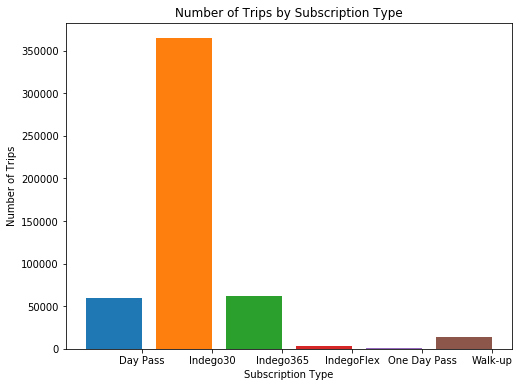

In [24]:
usage_plot(trip_data, 'subscription_type')

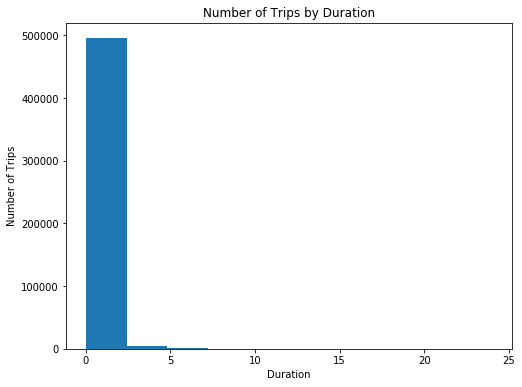

In [25]:
usage_plot(trip_data, 'duration')

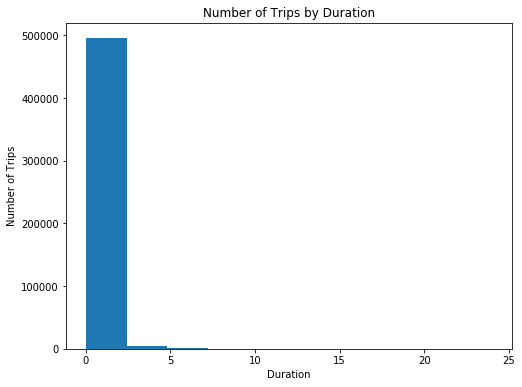

In [26]:
usage_plot(trip_data, 'duration', ['duration < 60'])

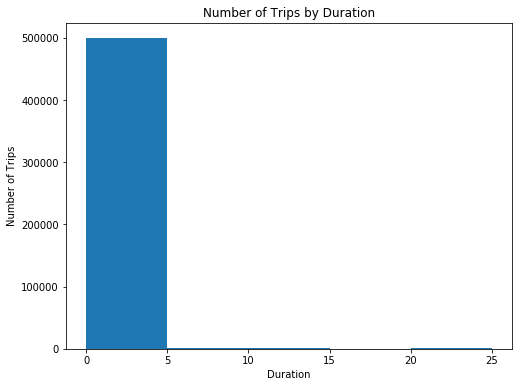

In [27]:
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

In [28]:
trip_data = pd.read_csv('trips_2017_summary.csv')
display(trip_data.head(100))

,duration,start_date,start_year,start_month,start_hour,start_sn,weekday,start_city,end_city,subscription_type
0,0.200000,2017-07-01,2017,7,0,0,Saturday,38th & Market,25th & Locust,Indego30
1,0.516667,2017-07-01,2017,7,0,0,Saturday,2nd & Market,11th & South,Walk-up
2,0.250000,2017-07-01,2017,7,0,0,Saturday,40th & Spruce,11th & South,Indego30
3,0.250000,2017-07-01,2017,7,0,0,Saturday,40th & Spruce,11th & South,Indego30
4,0.500000,2017-07-01,2017,7,0,0,Saturday,2nd & Market,11th & South,Walk-up
5,0.233333,2017-07-01,2017,7,0,0,Saturday,15th & Spruce,4th & Washington,Indego30
6,0.100000,2017-07-01,2017,7,0,0,Saturday,Spring Garden Station MFL,Race Street Pier,Indego30
7,0.250000,2017-07-01,2017,7,0,0,Saturday,9th & Locust,2nd & Market,Walk-up
8,0.933333,2017-07-01,2017,7,0,0,Saturday,2nd & South,12th & Filbert,Indego30
9,0.350000,2017-07-01,2017,7,0,0,Saturday,Pennsylvania Convention Center,Point Breeze & Tasker,Indego30


In [143]:
usage_stats(trip_data,)

There are 497226 data points in the dataset.
The average duration of trips is 0.37 minutes.
The median trip duration is 0.20 minutes.
25% of trips are shorter than 0.13 minutes.
25% of trips are longer than 0.33 minutes.


array([0.13333333, 0.2       , 0.33333333])

In [29]:
usage_plot(trip_data,)

Exception: No key has been provided. Make sure you provide a variable on which to plot the data.

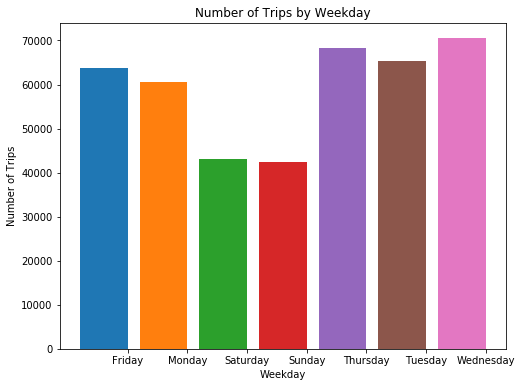

IndexError: index out of bounds

<Figure size 576x432 with 0 Axes>

In [30]:
usage_plot(trip_data,'weekday', ["subscription_type == 'Indego30'"])
usage_plot(trip_data,'weekday', ["subscription_type == 'Indego365'"])
usage_plot(trip_data,'weekday', ["subscription_type == 'Day Pass'"])
usage_plot(trip_data,'start_hour', ["subscription_type == 'Indego30'"],bin_width=1)
usage_plot(trip_data,'start_hour', ["subscription_type == 'Indego365'"],bin_width=1)
usage_plot(trip_data,'start_hour', ["subscription_type == 'Day Pass'"],bin_width=1)
#usage_plot(trip_data,'start_hour', ["subscription_type == 'Customer'"],bin_width=1)

In [35]:
#usage_plot(trip_data,'duration', ["duration < 90", "subscription_type == 'Indego30'"],bin_width=5)
#usage_plot(trip_data,'duration', ["duration < 90", "subscription_type == 'Indego365'"],bin_width=5)
#usage_plot(trip_data,'duration', ["duration < 90", "subscription_type == 'Day Pass'"],bin_width=5)

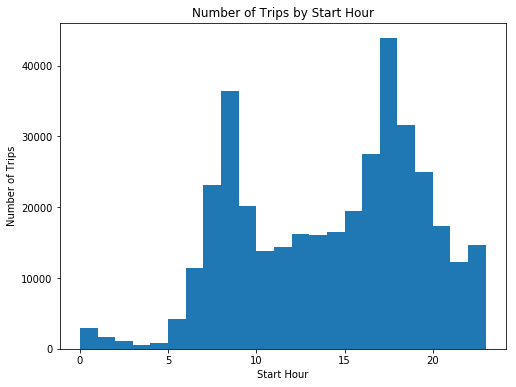

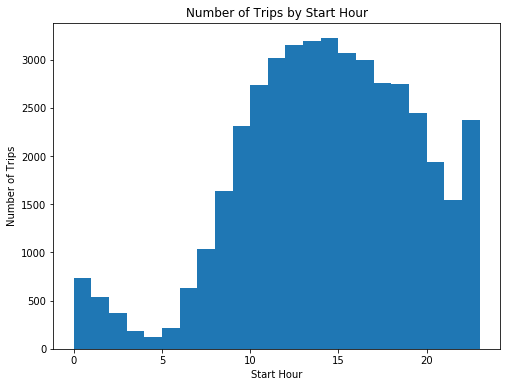

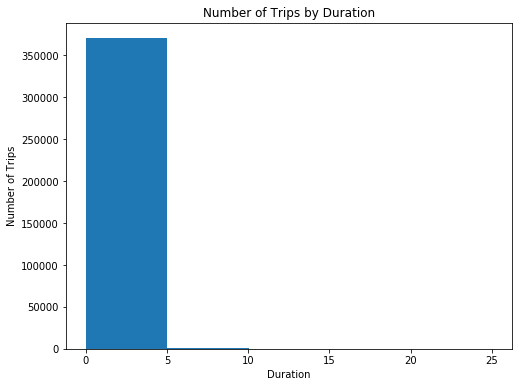

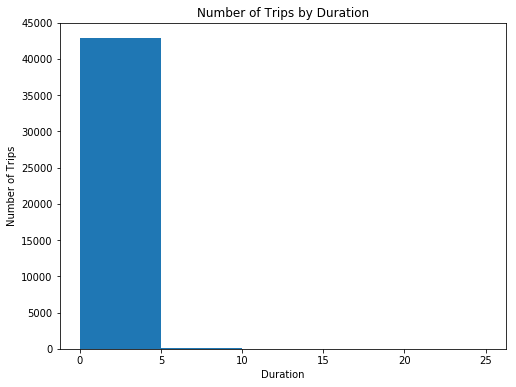

In [36]:
usage_plot(trip_data,'start_hour', [("weekday != 'Saturday'") and ("weekday != 'Sunday'"), "subscription_type == 'Indego30'"],bin_width=1)
usage_plot(trip_data,'start_hour', [("weekday == 'Saturday'") or ("weekday == 'Sunday'"), "subscription_type == 'Indego30'"],bin_width=1)
usage_plot(trip_data,'duration', [("weekday != 'Saturday'") and ("weekday != 'Sunday'"), "duration < 60", "subscription_type == 'Indego30'"],bin_width=5)
usage_plot(trip_data,'duration', [("weekday == 'Saturday'") or ("weekday == 'Sunday'"), "duration < 60", "subscription_type == 'Indego30'"],bin_width=5)